In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars_data = pd.read_csv("data/cars.csv")
cars_data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970[1975],"US; Detroit, Michigan",3.47,2.68,9.0
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970,US],3.47,2.68,9.0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,"1970, 1976",US,2.68,3.47,9.0
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970,US,3.19,3.40,10.0
4,ford torino,17.0,8,302.0,140,3449,10.5,1970-1972,US],3.19,3.40,8.0


In [3]:
cars_data.shape

(394, 12)

C:\Users\natha\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Displacement', ylabel='Acceleration'>

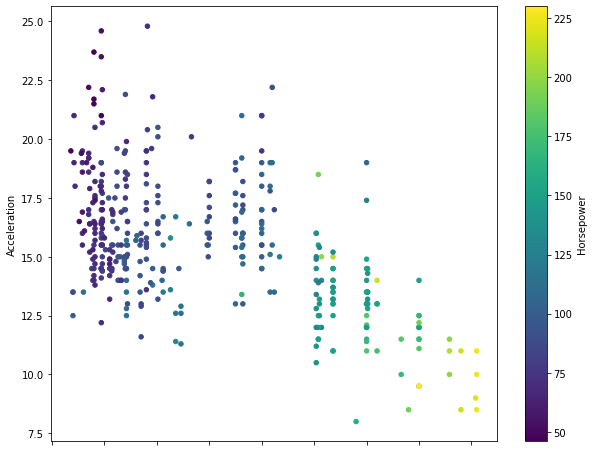

In [4]:
cars_data.plot.scatter(
    x="Displacement",
    y="Acceleration",
    c="Horsepower",
    colormap="viridis",
    figsize=(10, 8),
)

<AxesSubplot:xlabel='MPG', ylabel='Weight'>

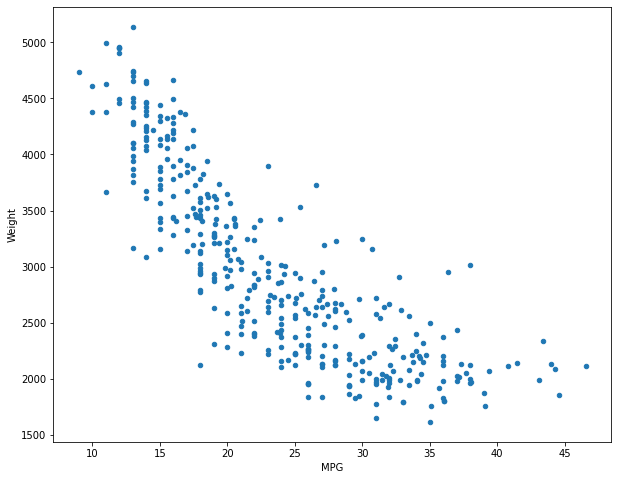

In [5]:
cars_data.plot.scatter(x="MPG", y="Weight", figsize=(10, 8))

In [6]:
cars_data.isnull().sum()

Model                0
MPG                  9
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [7]:
cars_data["MPG"] = cars_data["MPG"].fillna(cars_data["MPG"].mean())

In [8]:
cars_data.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [9]:
to_drop = ["bore", "stroke", "compression-ratio"]

In [10]:
cars_data.drop(to_drop, inplace=True, axis=1)
cars_data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970[1975],"US; Detroit, Michigan"
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970,US]
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,"1970, 1976",US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970,US
4,ford torino,17.0,8,302.0,140,3449,10.5,1970-1972,US]


In [11]:
cars_data["Year"].head(10)

0    1970[1975]
1          1970
2    1970, 1976
3          1970
4     1970-1972
5          1970
6    1970[1975]
7          1970
8          1970
9          1970
Name: Year, dtype: object

In [12]:
cars_data["Year"].str.isnumeric().value_counts()

True     357
False     37
Name: Year, dtype: int64

In [14]:
cars_data["Year"].loc[cars_data["Year"].str.isnumeric() == False]

0          1970[1975]
2          1970, 1976
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [15]:
extr = cars_data["Year"].str.extract(r"^(\d{4})", expand=False)
extr

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
389    1982
390    1982
391    1982
392    1982
393    1982
Name: Year, Length: 394, dtype: object

In [16]:
cars_data["Year"] = pd.to_numeric(extr)
cars_data["Year"].dtype

dtype('int64')

<AxesSubplot:xlabel='Year', ylabel='MPG'>

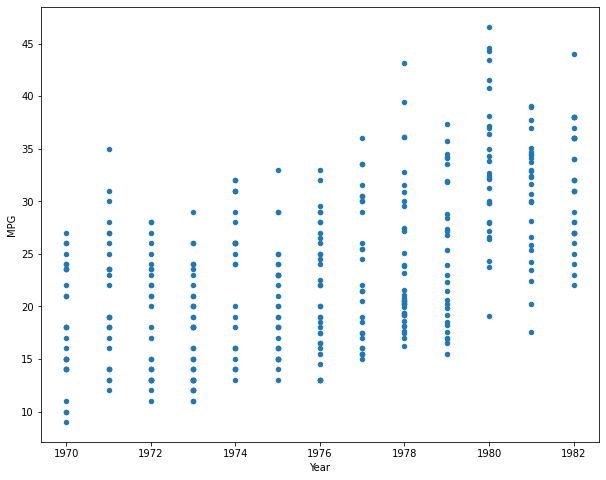

In [17]:
cars_data.plot.scatter(x="Year", y="MPG", figsize=(10, 8))